# CME 193 - Lecture 6 - Pandas

[Pandas](https://pandas.pydata.org/) is a Python library for dealing with data.  The main thing you'll hear people talk about is the DataFrame object (inspired by R), which is designed to hold tabular data.

In [1]:
import pandas as pd
import numpy as np

## Creating and combining dataframes

In [2]:
# Creating a dataframe
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eve', 'Frank', 'Grace'],
    'num_cats': [1, 2, 4, 8, 16, 32, None],
    'num_dogs': [7, None, 0, 0, 3, 2, 1],
    'location': ['NY', None, 'FL', 'HI', 'AK', 'AK', 'CA'],
})
df

,name,num_cats,num_dogs,location
0,Alice,1.0,7.0,NY
1,Bob,2.0,NaN,None
2,Carol,4.0,0.0,FL
3,Dan,8.0,0.0,HI
4,Eve,16.0,3.0,AK
5,Frank,32.0,2.0,AK
6,Grace,NaN,1.0,CA


In [3]:
df2 = pd.DataFrame({
    'name': ['Alice', 'Alex', 'Bob', 'Carl', 'Carol', 'Dan', 'David'],
    'favorite_animal': ['dog', 'dog', 'cat', 'dog', 'cat', 'turtle', 'dog']
})
df2

,name,favorite_animal
0,Alice,dog
1,Alex,dog
2,Bob,cat
3,Carl,dog
4,Carol,cat
5,Dan,turtle
6,David,dog


In [4]:
# Four types of joins:
# pd.merge(df, df2, how='outer', on='name')  # keep rows that appear in either df or df2
# pd.merge(df, df2, how='inner', on='name')  # keep rows that appear in both df and df2
# pd.merge(df, df2, how='left', on='name')  # keep rows that appear in df
# pd.merge(df, df2, how='right', on='name')  # keep rows that appear in df2

df3 = pd.merge(df, df2, how='outer', on='name')
df3

,name,num_cats,num_dogs,location,favorite_animal
0,Alice,1.0,7.0,NY,dog
1,Bob,2.0,NaN,None,cat
2,Carol,4.0,0.0,FL,cat
3,Dan,8.0,0.0,HI,turtle
4,Eve,16.0,3.0,AK,NaN
5,Frank,32.0,2.0,AK,NaN
6,Grace,NaN,1.0,CA,NaN
7,Alex,NaN,NaN,NaN,dog
8,Carl,NaN,NaN,NaN,dog
9,David,NaN,NaN,NaN,dog


## Working with columns

In [5]:
# Selecting a single column
df3['name']

0    Alice
1      Bob
2    Carol
3      Dan
4      Eve
5    Frank
6    Grace
7     Alex
8     Carl
9    David
Name: name, dtype: object

In [6]:
# Selecting multiple columns
df3[['name', 'num_cats', 'num_dogs']]

,name,num_cats,num_dogs
0,Alice,1.0,7.0
1,Bob,2.0,NaN
2,Carol,4.0,0.0
3,Dan,8.0,0.0
4,Eve,16.0,3.0
5,Frank,32.0,2.0
6,Grace,NaN,1.0
7,Alex,NaN,NaN
8,Carl,NaN,NaN
9,David,NaN,NaN


In [7]:
# Making a new column
df3['num_legs'] = 4 * (df['num_cats'] + df['num_dogs'])
df3

,name,num_cats,num_dogs,location,favorite_animal,num_legs
0,Alice,1.0,7.0,NY,dog,32.0
1,Bob,2.0,NaN,None,cat,NaN
2,Carol,4.0,0.0,FL,cat,16.0
3,Dan,8.0,0.0,HI,turtle,32.0
4,Eve,16.0,3.0,AK,NaN,76.0
5,Frank,32.0,2.0,AK,NaN,136.0
6,Grace,NaN,1.0,CA,NaN,NaN
7,Alex,NaN,NaN,NaN,dog,NaN
8,Carl,NaN,NaN,NaN,dog,NaN
9,David,NaN,NaN,NaN,dog,NaN


In [8]:
# Calculating summaries
print(df3['num_legs'].sum())
print(df3['num_legs'].median())

292.0
32.0


In [9]:
df3['favorite_animal'].value_counts()

dog       4
cat       2
turtle    1
Name: favorite_animal, dtype: int64

In [10]:
# Deleting columns by name
df3 = df3.drop(['location'], axis=1)

In [11]:
df3

,name,num_cats,num_dogs,favorite_animal,num_legs
0,Alice,1.0,7.0,dog,32.0
1,Bob,2.0,NaN,cat,NaN
2,Carol,4.0,0.0,cat,16.0
3,Dan,8.0,0.0,turtle,32.0
4,Eve,16.0,3.0,NaN,76.0
5,Frank,32.0,2.0,NaN,136.0
6,Grace,NaN,1.0,NaN,NaN
7,Alex,NaN,NaN,dog,NaN
8,Carl,NaN,NaN,dog,NaN
9,David,NaN,NaN,dog,NaN


## Selecting rows

In [12]:
# Selecting first five rows
df3.head(3)

,name,num_cats,num_dogs,favorite_animal,num_legs
0,Alice,1.0,7.0,dog,32.0
1,Bob,2.0,NaN,cat,NaN
2,Carol,4.0,0.0,cat,16.0


In [13]:
# Selecting last five rows
df3.tail(5)

,name,num_cats,num_dogs,favorite_animal,num_legs
5,Frank,32.0,2.0,NaN,136.0
6,Grace,NaN,1.0,NaN,NaN
7,Alex,NaN,NaN,dog,NaN
8,Carl,NaN,NaN,dog,NaN
9,David,NaN,NaN,dog,NaN


In [66]:
# Selecting by criteria: those who have more cats than dogs
df3.loc[df3['num_cats'] > df3['num_dogs']]

,num_cats,num_dogs,favorite_animal,num_legs,num_legs2
name,,,,,
Carol,4.0,0.0,cat,16.0,16.0
Dan,8.0,0.0,turtle,32.0,32.0
Eve,16.0,3.0,NaN,76.0,76.0
Frank,32.0,2.0,NaN,136.0,136.0


In [67]:
# Selecting by criteria as well as columns
df3.loc[df3['num_cats'] > df3['num_dogs'], ['num_dogs', 'num_cats']]

,num_dogs,num_cats
name,,
Carol,0.0,4.0
Dan,0.0,8.0
Eve,3.0,16.0
Frank,2.0,32.0


In [18]:
# Selecting by index requires setting an index
df3 = df3.set_index('name')
df3

,num_cats,num_dogs,favorite_animal,num_legs
name,,,,
Alice,1.0,7.0,dog,32.0
Bob,2.0,NaN,cat,NaN
Carol,4.0,0.0,cat,16.0
Dan,8.0,0.0,turtle,32.0
Eve,16.0,3.0,NaN,76.0
Frank,32.0,2.0,NaN,136.0
Grace,NaN,1.0,NaN,NaN
Alex,NaN,NaN,dog,NaN
Carl,NaN,NaN,dog,NaN


In [19]:
# Now we can access by name by indexing into dataframe.loc
df3.loc['Dan']

num_cats                8
num_dogs                0
favorite_animal    turtle
num_legs               32
Name: Dan, dtype: object

In [20]:
# Can even slice
df3.loc['Dan':'Alex']

,num_cats,num_dogs,favorite_animal,num_legs
name,,,,
Dan,8.0,0.0,turtle,32.0
Eve,16.0,3.0,NaN,76.0
Frank,32.0,2.0,NaN,136.0
Grace,NaN,1.0,NaN,NaN
Alex,NaN,NaN,dog,NaN


In [19]:
# Deleting rows by index
df3.drop(['Bob', 'Grace'])

,num_cats,num_dogs,favorite_animal,num_legs
name,,,,
Alice,1.0,7.0,dog,32.0
Carol,4.0,0.0,cat,16.0
Dan,8.0,0.0,turtle,32.0
Eve,16.0,3.0,NaN,76.0
Frank,32.0,2.0,NaN,136.0
Alex,NaN,NaN,dog,NaN
Carl,NaN,NaN,dog,NaN
David,NaN,NaN,dog,NaN


In [20]:
# Important note: Pandas always makes copies
df3  # Bob and Grace are still there!

# To save changes, assign it to the same variable, like:
#df3 = df3.drop(['Bob', 'Grace'])

,num_cats,num_dogs,favorite_animal,num_legs
name,,,,
Alice,1.0,7.0,dog,32.0
Bob,2.0,NaN,cat,NaN
Carol,4.0,0.0,cat,16.0
Dan,8.0,0.0,turtle,32.0
Eve,16.0,3.0,NaN,76.0
Frank,32.0,2.0,NaN,136.0
Grace,NaN,1.0,NaN,NaN
Alex,NaN,NaN,dog,NaN
Carl,NaN,NaN,dog,NaN


In [21]:
# Deletes all rows with missing data
df3.dropna(subset=['num_dogs', 'num_cats'])

,num_cats,num_dogs,favorite_animal,num_legs
name,,,,
Alice,1.0,7.0,dog,32.0
Carol,4.0,0.0,cat,16.0
Dan,8.0,0.0,turtle,32.0
Eve,16.0,3.0,NaN,76.0
Frank,32.0,2.0,NaN,136.0


In [22]:
# Sorts rows by a column
df3.sort_values(['num_legs', 'favorite_animal'])

,num_cats,num_dogs,favorite_animal,num_legs
name,,,,
Carol,4.0,0.0,cat,16.0
Alice,1.0,7.0,dog,32.0
Dan,8.0,0.0,turtle,32.0
Eve,16.0,3.0,NaN,76.0
Frank,32.0,2.0,NaN,136.0
Bob,2.0,NaN,cat,NaN
Alex,NaN,NaN,dog,NaN
Carl,NaN,NaN,dog,NaN
David,NaN,NaN,dog,NaN


In [21]:
# Grouping by a column and then performing an aggregation
df3.groupby('favorite_animal').sum()

,num_cats,num_dogs,num_legs
favorite_animal,,,
cat,6.0,0.0,16.0
dog,1.0,7.0,32.0
turtle,8.0,0.0,32.0


In [22]:
df3

,num_cats,num_dogs,favorite_animal,num_legs
name,,,,
Alice,1.0,7.0,dog,32.0
Bob,2.0,NaN,cat,NaN
Carol,4.0,0.0,cat,16.0
Dan,8.0,0.0,turtle,32.0
Eve,16.0,3.0,NaN,76.0
Frank,32.0,2.0,NaN,136.0
Grace,NaN,1.0,NaN,NaN
Alex,NaN,NaN,dog,NaN
Carl,NaN,NaN,dog,NaN


In [26]:
# Setting rows where num_cats is undefined, to zero
df3.loc[df3['num_cats'].isnull(), 'num_cats'] = 0

In [65]:
# Setting all undefined to 0
df3.fillna(0)

,num_cats,num_dogs,favorite_animal,num_legs,num_legs2
name,,,,,
Alice,1.0,7.0,dog,32.0,32.0
Bob,2.0,0.0,cat,0.0,8.0
Carol,4.0,0.0,cat,16.0,16.0
Dan,8.0,0.0,turtle,32.0,32.0
Eve,16.0,3.0,0,76.0,76.0
Frank,32.0,2.0,0,136.0,136.0
Grace,0.0,1.0,0,0.0,4.0
Alex,0.0,0.0,dog,0.0,0.0
Carl,0.0,0.0,dog,0.0,0.0


In [30]:
# Adding a column with an arbitrary computation of the row
def compute_num_legs(row):
    if np.isnan(row['num_dogs']):
        return 4 * row['num_cats']
    else:
        return 4 * (row['num_cats'] + row['num_dogs'])

df3['num_legs2'] = df3.apply(compute_num_legs, axis=1)
df3

,num_cats,num_dogs,favorite_animal,num_legs,num_legs2
name,,,,,
Alice,1.0,7.0,dog,32.0,32.0
Bob,2.0,NaN,cat,NaN,8.0
Carol,4.0,0.0,cat,16.0,16.0
Dan,8.0,0.0,turtle,32.0,32.0
Eve,16.0,3.0,NaN,76.0,76.0
Frank,32.0,2.0,NaN,136.0,136.0
Grace,0.0,1.0,NaN,NaN,4.0
Alex,0.0,NaN,dog,NaN,0.0
Carl,0.0,NaN,dog,NaN,0.0


In [38]:
# Comparing NaNs has some quirks
if np.nan == np.nan:  # returns False
    print('this won\'t actually run')

if np.isnan(np.nan):  # returns True
    print('this runs')

this runs


## Exercise 8
In this exercise, you'll download and play with [CO2 data collected at the Mauna Loa observatory](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html) over the last 60 years. Use the following code to load the dataset, and complete the cells below.

In [39]:
df = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', 
                  delim_whitespace=True, 
                  comment='#',
                  names=["year", "month", "decdate", "co2", "co2interp", "trend", "days"])

pd.set_option('display.max_rows', 10)
df

,year,month,decdate,co2,co2interp,trend,days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...,...
728,2018,11,2018.875,408.02,408.02,410.02,24
729,2018,12,2018.958,409.07,409.07,409.75,30
730,2019,1,2019.042,410.83,410.83,410.54,27
731,2019,2,2019.125,411.75,411.75,410.94,27


In [40]:
df.describe()

,year,month,decdate,co2,co2interp,trend,days
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,1988.208731,6.495225,1988.708333,350.047462,354.098881,354.095798,18.417462
std,17.647546,3.454472,17.645263,52.137046,27.793081,27.729082,12.222117
min,1958.000000,1.000000,1958.208000,-99.990000,312.660000,314.620000,-1.000000
25%,1973.000000,3.000000,1973.458000,328.540000,328.640000,329.620000,-1.000000
50%,1988.000000,6.000000,1988.708000,351.530000,351.530000,352.130000,25.000000
75%,2003.000000,9.000000,2003.958000,376.450000,376.450000,376.780000,28.000000
max,2019.000000,12.000000,2019.208000,411.970000,411.970000,410.940000,31.000000


The dataframe currently contains columns called `year` and `month`. The goal is to introduce a new column called `date` that combines the year and month into one column. To do this, we will use a Pandas built-in function called `pd.to_datetime`, which accepts as its first argument a dataframe with three columns, `month`, `day`, and `year`, and outputs a dataframe with a single column corresponding to the date. 

First, create a column called `day` in the dataframe `df`, and set it equal to `1` for all rows. (This is so that, for example, the row with year 1958 and month 3 will be treated as March 1, 1958.)

In [42]:
# YOUR CODE HERE (1 lines, but feel free to also print df if you'd like)
df['day'] = 1
df

,year,month,decdate,co2,co2interp,trend,days,day
0,1958,3,1958.208,315.71,315.71,314.62,-1,1
1,1958,4,1958.292,317.45,317.45,315.29,-1,1
2,1958,5,1958.375,317.50,317.50,314.71,-1,1
3,1958,6,1958.458,-99.99,317.10,314.85,-1,1
4,1958,7,1958.542,315.86,315.86,314.98,-1,1
...,...,...,...,...,...,...,...,...
728,2018,11,2018.875,408.02,408.02,410.02,24,1
729,2018,12,2018.958,409.07,409.07,409.75,30,1
730,2019,1,2019.042,410.83,410.83,410.54,27,1
731,2019,2,2019.125,411.75,411.75,410.94,27,1


Next, select the three columns `month`, `day`, and `year` from `df` and pass the resulting three-column dataframe to `pd.to_datetime`. Create a new column `date` in `df` and set it equal to the output of `pd.to_datetime` to create a new column corresponding to the date.

In [46]:
# YOUR CODE HERE (1 line)
df['date'] = pd.to_datetime(df[['month', 'day', 'year']])
df

,year,month,decdate,co2,co2interp,trend,days,day,date
0,1958,3,1958.208,315.71,315.71,314.62,-1,1,1958-03-01
1,1958,4,1958.292,317.45,317.45,315.29,-1,1,1958-04-01
2,1958,5,1958.375,317.50,317.50,314.71,-1,1,1958-05-01
3,1958,6,1958.458,-99.99,317.10,314.85,-1,1,1958-06-01
4,1958,7,1958.542,315.86,315.86,314.98,-1,1,1958-07-01
...,...,...,...,...,...,...,...,...,...
728,2018,11,2018.875,408.02,408.02,410.02,24,1,2018-11-01
729,2018,12,2018.958,409.07,409.07,409.75,30,1,2018-12-01
730,2019,1,2019.042,410.83,410.83,410.54,27,1,2019-01-01
731,2019,2,2019.125,411.75,411.75,410.94,27,1,2019-02-01


From this point onward, we only care about the columns `date`, `co2`, and `trend`. Select only these columns and discard everything else.

In [47]:
# YOUR CODE HERE (1 line)
df = df[['date', 'co2', 'trend']]

In [49]:
df

,date,co2,trend
0,1958-03-01,315.71,314.62
1,1958-04-01,317.45,315.29
2,1958-05-01,317.50,314.71
3,1958-06-01,-99.99,314.85
4,1958-07-01,315.86,314.98
...,...,...,...
728,2018-11-01,408.02,410.02
729,2018-12-01,409.07,409.75
730,2019-01-01,410.83,410.54
731,2019-02-01,411.75,410.94


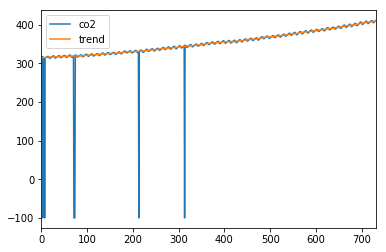

In [51]:
df[['co2', 'trend']].plot()

Set the index to `date` (use `df.set_index`).

In [52]:
# YOUR CODE HERE (1 line)
df = df.set_index('date')

In [53]:
df

,co2,trend
date,,
1958-03-01,315.71,314.62
1958-04-01,317.45,315.29
1958-05-01,317.50,314.71
1958-06-01,-99.99,314.85
1958-07-01,315.86,314.98
...,...,...
2018-11-01,408.02,410.02
2018-12-01,409.07,409.75
2019-01-01,410.83,410.54


Plot the data by using `df.plot()`. What do you notice?

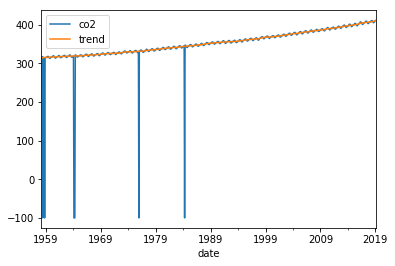

In [55]:
# YOUR CODE HERE (1 line)
df.plot()

The dataset uses -99.99 in the `co2` column to denote missing data. Set these values to `None` instead.

In [56]:
# YOUR CODE HERE (1 line)
df.loc[df['co2'] == -99.99, 'co2'] = None
df

,co2,trend
date,,
1958-03-01,315.71,314.62
1958-04-01,317.45,315.29
1958-05-01,317.50,314.71
1958-06-01,NaN,NaN
1958-07-01,315.86,314.98
...,...,...
2018-11-01,408.02,410.02
2018-12-01,409.07,409.75
2019-01-01,410.83,410.54


Actually, we don't want these rows anyway. Delete these rows (`df.dropna()`).

In [58]:
# YOUR CODE HERE (1 line)
df = df.dropna()

Plot the data again (`df.plot()`). Is the problem solved?

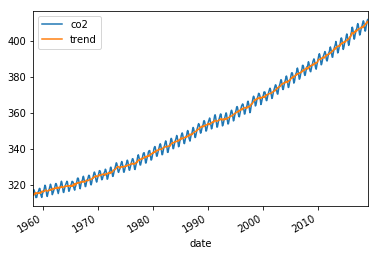

In [59]:
# YOUR CODE HERE (1 line)
df.plot()

Now plot only the data since 2008 (by selecting only the rows after 2008).

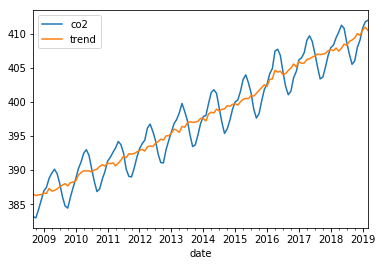

In [63]:
# YOUR CODE HERE (1 line)
df.loc['2008-09':].plot()

In [68]:
df.loc[df.index.month == 9]  # Selecting only Septembers

,co2,trend
date,,
1958-09-01,313.20,315.91
1959-09-01,313.84,316.55
1960-09-01,314.16,316.87
1961-09-01,314.80,317.49
1962-09-01,316.26,319.03
...,...,...
2014-09-01,395.38,398.97
2015-09-01,397.63,401.26
2016-09-01,401.05,404.61
